## Loan Prediction Project (Data Hack)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv(r'E:\Data Science Projects\Loan Prediction Project (Data Hack)\train_ctrUa4K.csv')

In [7]:
test = pd.read_csv(r'E:\Data Science Projects\Loan Prediction Project (Data Hack)\test_lAUu6dG.csv')

In [8]:
train_original = train.copy()
test_original = test.copy()

In [10]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
dir(train)

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents',
 'Education',
 'Gender',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_ID',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__m

In [13]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [16]:
train.shape

(614, 13)

In [17]:
test.shape

(367, 12)

In [18]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<font size = '+2'><span style='color : blue'>Univariate Analysis</span></font>


In [19]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

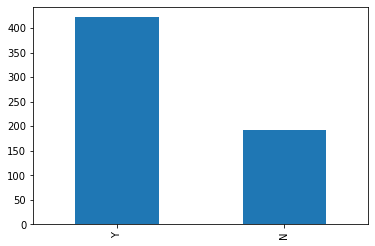

In [21]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422 people out of 614 was approved

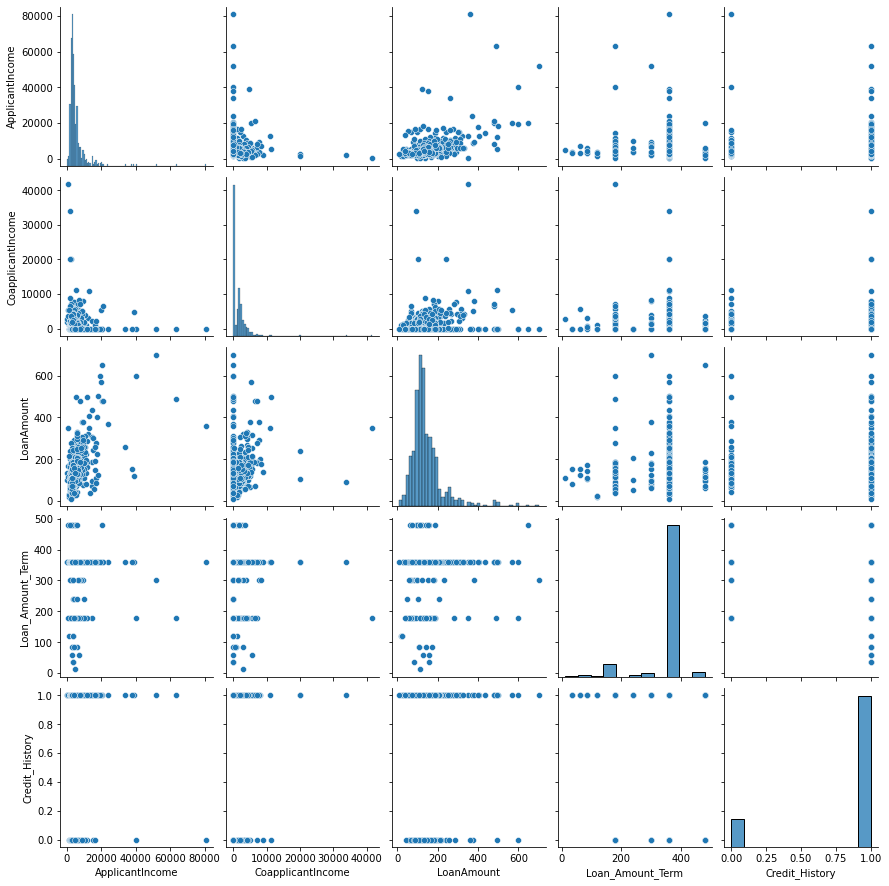

In [22]:
sns.pairplot(train)

<AxesSubplot:title={'center':'Credit_History'}>

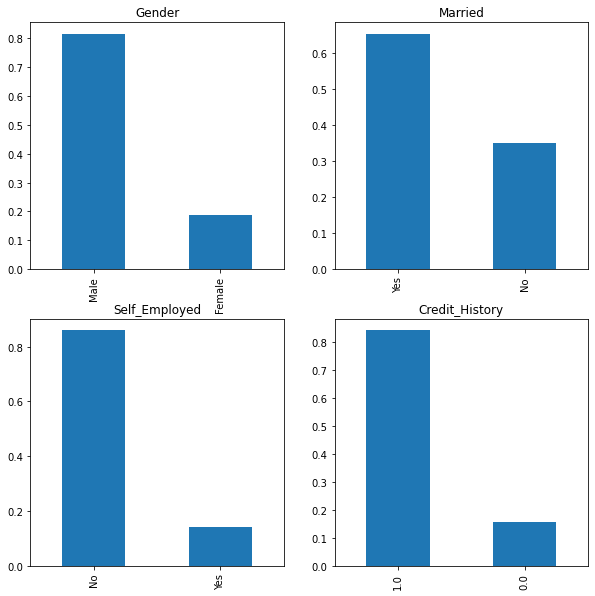

In [40]:
plt.figure(figsize= (10, 10))

plt.subplot(2,2,1)

train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')

plt.subplot(2, 2, 2)

train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')

plt.subplot(2, 2, 3)

train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')

plt.subplot(2, 2, 4)

train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')


<AxesSubplot:title={'center':'Property_Area'}>

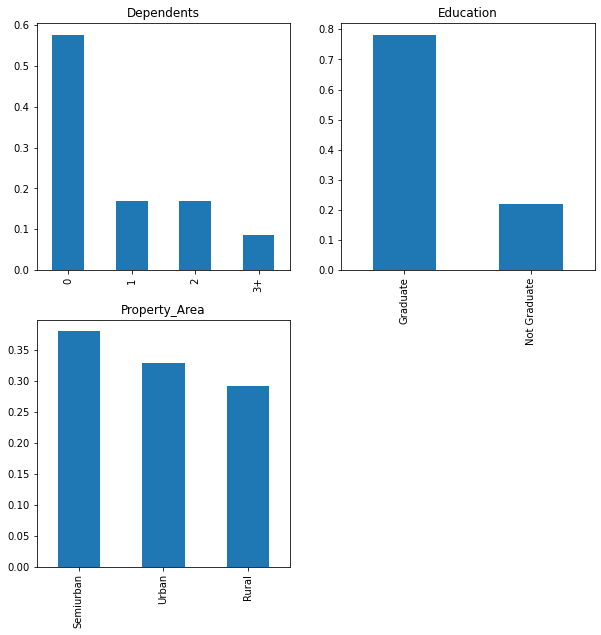

In [43]:
plt.figure(figsize= (10, 10))

plt.subplot(2,2,1)

train['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')

plt.subplot(2, 2, 2)

train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

plt.subplot(2, 2, 3)

train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

<AxesSubplot:xlabel='ApplicantIncome'>

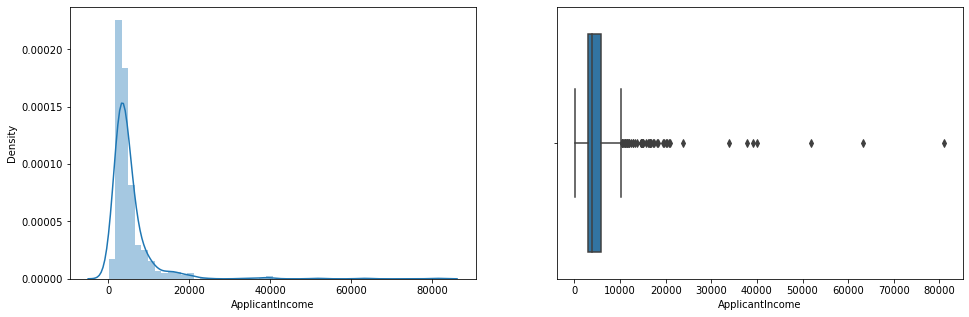

In [53]:
plt.figure(figsize = (16, 5))
plt.subplot(1,2,1)

sns.distplot(train['ApplicantIncome'])

plt.subplot(1,2,2)

sns.boxplot(x=train['ApplicantIncome'])


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

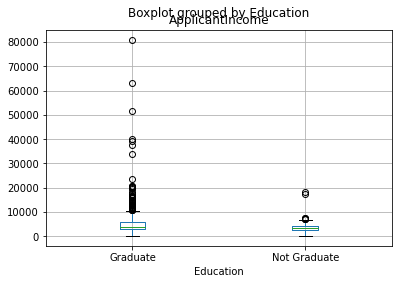

In [57]:
train.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:xlabel='CoapplicantIncome'>

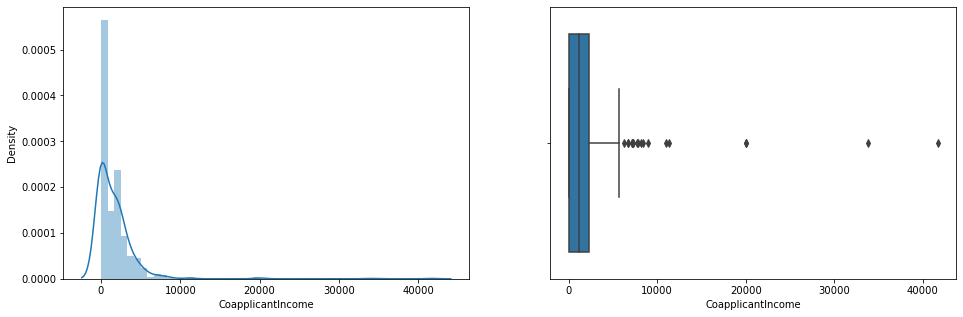

In [58]:
plt.figure(figsize = (16, 5))
plt.subplot(1,2,1)

sns.distplot(train['CoapplicantIncome'])

plt.subplot(1,2,2)

sns.boxplot(x=train['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount'>

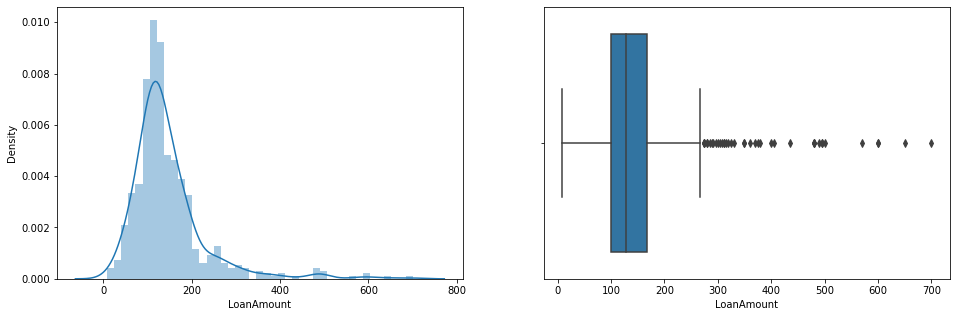

In [59]:
plt.figure(figsize = (16, 5))
plt.subplot(1,2,1)

sns.distplot(train['LoanAmount'])

plt.subplot(1,2,2)

sns.boxplot(x=train['LoanAmount'])

<font size = "+2"><span style="color : blue">Bivariate Aanalysis</span></font>

In [60]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

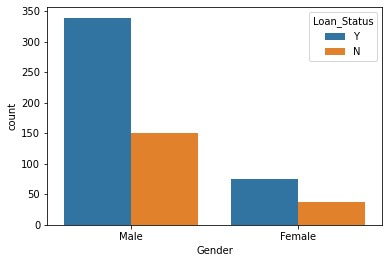

In [70]:
sns.countplot('Gender', hue='Loan_Status', data=train)

In [71]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Loan_Status'>

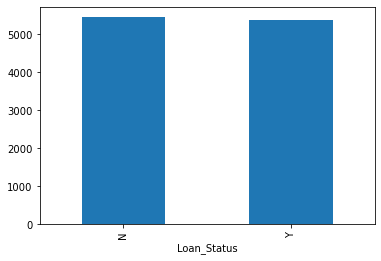

In [82]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [90]:
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']

In [98]:
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)

In [99]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [100]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])

<AxesSubplot:xlabel='Income_bin'>

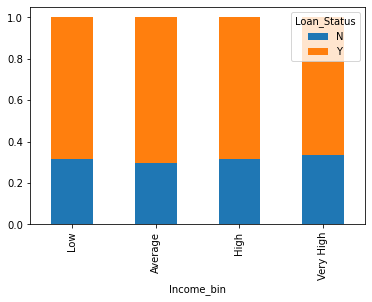

In [104]:
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)

In [105]:
matrix = train.corr()

In [106]:
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

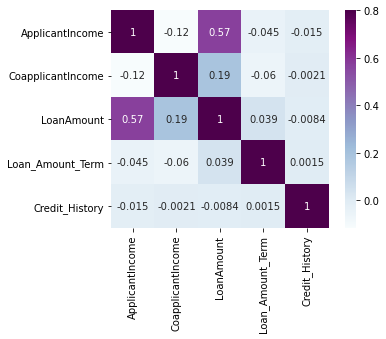

In [110]:
sns.heatmap(matrix, annot =True, cmap='BuPu', square = True, vmax=0.8)

In [109]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [112]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bin            0
dtype: int64

In [113]:
help(pd.Series.mode)

Help on function mode in module pandas.core.series:

mode(self, dropna=True) -> 'Series'
    Return the mode(s) of the dataset.
    
    Always returns Series even if only one value is returned.
    
    Parameters
    ----------
    dropna : bool, default True
        Don't consider counts of NaN/NaT.
    
        .. versionadded:: 0.24.0
    
    Returns
    -------
    Series
        Modes of the Series in sorted order.



In [116]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)

In [118]:
train['Gender'].isnull().sum()

0

In [119]:
train['Married'].fillna(train['Married'].mode()[0], inplace = True)

In [120]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)

In [121]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)

In [122]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [123]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [124]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
Income_bin            0
dtype: int64

In [127]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [132]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [134]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [135]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
dtype: int64

In [136]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)

test['Married'].fillna(test['Married'].mode()[0], inplace = True)

test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)

test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)

test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)


test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

In [137]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [138]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

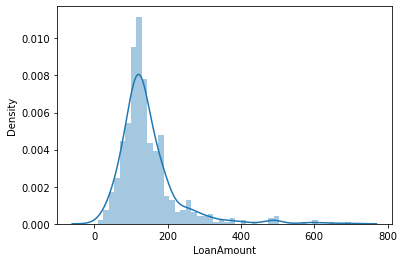

In [142]:
sns.distplot(train['LoanAmount'])

<AxesSubplot:>

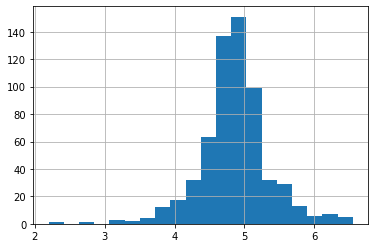

In [143]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

train['LoanAmount_log'].hist(bins=20)

Building a Model


In [144]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,High,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,4.948760


In [145]:
train.drop('Loan_ID', axis='columns')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,High,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average,4.262680
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very High,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very High,5.231109


In [146]:
test.drop('Loan_ID', axis='columns')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [147]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,High,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,4.948760


In [148]:
train.drop('Loan_ID', axis='columns', inplace = True)

In [149]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,High,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,4.948760


In [150]:
X = train.drop('Loan_Status', axis=1)
y= train.Loan_Status

In [151]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bin,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,High,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,High,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Average,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Average,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,High,4.948760


In [153]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,High


In [154]:
X.drop('Income_bin', axis=1, inplace = True)

In [155]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [172]:
X = pd.get_dummies(X, columns=['Gender', 'Married','Education','Self_Employed', 'Property_Area'], drop_first = True)

KeyError: "['Self_Employed', 'Property_Area', 'Married', 'Education', 'Gender'] not in index"

In [161]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [169]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Gender_Male              614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Education_Not Graduate   614 non-null    uint8  
 9   Self_Employed_Yes        614 non-null    uint8  
 10  Property_Area_Semiurban  614 non-null    uint8  
 11  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int64(1), object(1), uint8(6)
memory usage: 32.5+ KB


In [171]:
X.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [173]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [174]:
X=pd.get_dummies(X, columns=['Dependents'], drop_first=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,0,0,0
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,0,0,0


In [215]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [217]:
y = pd.get_dummies(y, drop_first = True)

In [218]:
y.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [219]:
from sklearn.model_selection import train_test_split

In [220]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
lg = LogisticRegression()

In [223]:
lg.fit(X_train, y_train)

LogisticRegression()

In [224]:
predicted_values = lg.predict(X_test)

In [225]:
predicted_values

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1], dtype=uint8)

In [226]:
from sklearn.metrics import accuracy_score

In [227]:
accuracy_score(y_test, predicted_values) #accuracy_score for Logistic Regression

0.8177339901477833

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
rf = RandomForestClassifier()

In [231]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [232]:
pred_vals = rf.predict(X_test)

In [233]:
accuracy_score(y_test, pred_vals)

0.8275862068965517

## Predictions for Test Dataset

In [234]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [235]:
test.drop('Loan_ID', axis=1, inplace=True)

In [236]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [237]:
test.drop('LoanAmount', axis=1, inplace=True)

In [238]:
test = pd.get_dummies(test, drop_first =True)

In [239]:
test

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,360.0,1.0,4.700480,1,1,0,0,0,0,0,0,1
1,3076,1500,360.0,1.0,4.836282,1,1,1,0,0,0,0,0,1
2,5000,1800,360.0,1.0,5.337538,1,1,0,1,0,0,0,0,1
3,2340,2546,360.0,1.0,4.605170,1,1,0,1,0,0,0,0,1
4,3276,0,360.0,1.0,4.356709,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,360.0,1.0,4.727388,1,1,0,0,1,1,1,0,1
363,4158,709,360.0,1.0,4.744932,1,1,0,0,0,0,0,0,1
364,3250,1993,360.0,1.0,4.836282,1,0,0,0,0,0,0,1,0
365,5000,2393,360.0,1.0,5.062595,1,1,0,0,0,0,0,0,0


In [240]:
pred_test = rf.predict(test)

In [241]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [242]:
submission = pd.read_csv(r'E:\Data Science Projects\Loan Prediction Project (Data Hack)\Sample Submission\sample_submission_49d68Cx.csv')

In [243]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [244]:
submission['Loan_ID'] = test_original['Loan_ID']

In [245]:
submission['Loan_Status'] = pred_test

In [246]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,0
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,0
365,LP002986,0


In [247]:
submission['Loan_Status'].replace(0, 'N', inplace =True)
submission['Loan_Status'].replace(1, 'Y', inplace =True)

In [248]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,N


In [255]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic_reg.csv', index = False)

In [256]:
df =pd.read_csv(r'logistic_reg.csv')

In [257]:
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,N


## Stratified K-Fold Cross Validation

In [263]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [281]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))



score_logisticR = []

score_SVM = []

score_RandomForest = []
    

In [282]:
skf = StratifiedKFold(n_splits = 10)

In [287]:
score = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index] 
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    score_logisticR.append(get_score(LogisticRegression(),  X_train, X_test, y_train, y_test ))
    
    score_SVM.append(get_score(SVC(),  X_train, X_test, y_train, y_test ))
    
    score_RandomForest.append(get_score(RandomForestClassifier(n_estimators = 40),  X_train, X_test, y_train, y_test ))

In [288]:
score_logisticR


[0.8064516129032258,
 0.8225806451612904,
 0.7419354838709677,
 0.7258064516129032,
 0.7868852459016393,
 0.7868852459016393,
 0.8360655737704918,
 0.8360655737704918,
 0.7540983606557377,
 0.8360655737704918,
 0.8064516129032258,
 0.8225806451612904,
 0.7419354838709677,
 0.7258064516129032,
 0.7868852459016393,
 0.7868852459016393,
 0.8360655737704918,
 0.8360655737704918,
 0.7540983606557377,
 0.8360655737704918,
 0.8064516129032258,
 0.8225806451612904,
 0.7419354838709677,
 0.7258064516129032,
 0.7868852459016393,
 0.7868852459016393,
 0.8360655737704918,
 0.8360655737704918,
 0.7540983606557377,
 0.8360655737704918,
 0.8064516129032258,
 0.8225806451612904,
 0.7419354838709677,
 0.7258064516129032,
 0.7868852459016393,
 0.7868852459016393,
 0.8360655737704918,
 0.8360655737704918,
 0.7540983606557377,
 0.8360655737704918]

In [289]:
 score_SVM

[0.6935483870967742,
 0.6935483870967742,
 0.6774193548387096,
 0.6774193548387096,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6935483870967742,
 0.6935483870967742,
 0.6774193548387096,
 0.6774193548387096,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344]

In [290]:
score_RandomForest

[0.7741935483870968,
 0.7741935483870968,
 0.7419354838709677,
 0.7419354838709677,
 0.7377049180327869,
 0.7704918032786885,
 0.8360655737704918,
 0.7868852459016393,
 0.7704918032786885,
 0.8032786885245902]

In [291]:
np.mean(score_logisticR)

0.7932839767318878

In [292]:
np.mean(score_SVM)

0.6873083024854575

In [293]:
np.mean(score_RandomForest)

0.7737176097303015

In [297]:
importances = pd.Series(rf.feature_importances_, index =X.columns)

<AxesSubplot:>

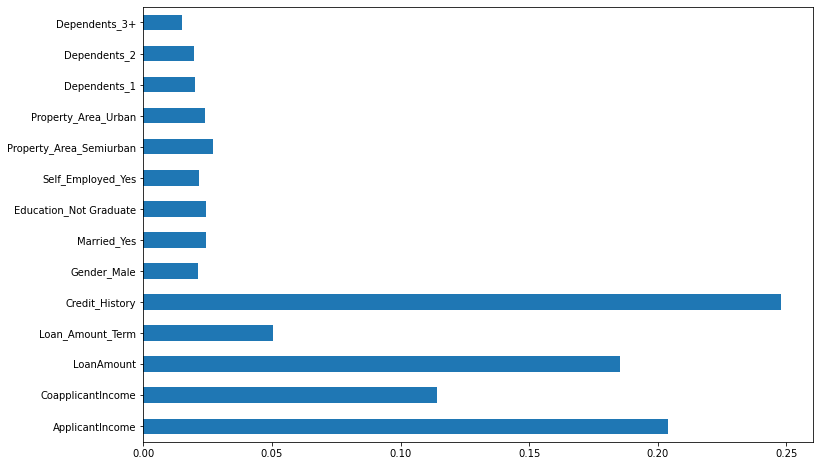

In [298]:
importances.plot(kind='barh', figsize=(12,8))